In [4]:
B=CoxeterGroup(['B',3],implementation='matrix')
count=0
bigrasses=[]
for x in B.grassmannian_elements():
    if x.inverse() in B.grassmannian_elements():
        count+=1
        bigrasses.append(x)
        #print x.matrix()
        #print '-------'
print count
Poe=B.bruhat_poset()

20


In [5]:
def sumAboveRight(i,j,mat):
    m=mat.dimensions()[0]
    n=mat.dimensions()[1]
    total = 0
    for row in range(0,i+1):
        for col in range(j+1,m):
            total += mat[row][col]
    return total

def sumBelowLeft(i,j,mat):
    m=mat.dimensions()[0]
    n=mat.dimensions()[1]
    total = 0
    for row in range(i+1,n):
        for col in range(0,j+1):
            total += mat[row][col]
    return total

def gwu(mat):
    n=mat.dimensions()[0]
    return matrix(n-1,n-1,lambda i,j: sumAboveRight(i,j,mat) if i<=j else sumBelowLeft(i,j,mat))

def gwl(mat):
    n=mat.dimensions()[0]
    return matrix(n-1,n-1,lambda i,j: sumAboveRight(i,j,mat) if i<j else sumBelowLeft(i,j,mat))

def matAve(mat1,mat2):
    return matrix(mat1.dimensions()[0],mat1.dimensions()[1],lambda i,j: mean([mat1[i][j],mat2[i][j]]))
def gwa(mat):
    return matAve(gwu(mat),gwl(mat))
def makeF(vector):
    count=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
    for x in vector:
        count[x]+=1
    return count

def makeVec(mat):
    vec=[]
    for x in mat.rows():
        for y in x:
            vc.append(y)
    return vec
def removeDups(values):
    ouput = []
    for val in values:
        # If value has not been encountered yet,
        # ... add it to output
        addToOutput = True
        for o in output:
            if o == value:
                addToOutput = False
        if addToOutput:
            output.append(value)
    return output
def removeZeros(list):
    newlist=[]
    for x in list:
        if x.dot_product(x)!=0:
            newlist.append(x)
    return newlist
def isSIF(x):
    Wald=gwl(x.matrix())
    if len(removeDups(removeZeros(Wald.columns())))==len(Wald.columns()):
        return true
    else:
        return false
def makeSifs(n):
    stuff=[]
    for x in SymmetricGroup(n):
        if isSIF(x):
            stuff.append(x)
    return stuff
def takeToMiddle(mat):
    if mat.dimensions()[0]==1:
        return mat[0][0]
    else:
        return takeToMiddle(gwa(mat))

def WD(mat):
    if gwl(mat)==gwu(mat):
        return true
def howFar(mat,count):
    if WD(mat) and mat.dimensions()[1]>1:
        return howFar(gwl(mat),count+1)
    else:
        return count
def makeBari(mat):
    vec=[]
    for x in mat.columns():
        vec.append(sum(x)/len(x))
    return vector(vec)
def heighestUM(n):
    UM=[]
    if is_even(n):
        n=n+2
        for x in range(1, floor(n/2)):
            UM.append(x)
        for x in range(1,floor(n/2)):
            UM.append(floor(n/2)-x)
        return vector(UM)
    else:
        n=n+4
        for x in range(1,floor(n/2)):
            UM.append(x)
        for x in range(1,floor(n/2)-1):
            UM.append(floor(n/2)-x-1)
        return vector(UM)
def OnesVec(n):
    vec=[]
    for x in range(n):
        vec.append(1)
    return vector(vec)
def height2(mat):
    vec=makeBari(mat)
    return vec.dot_product(OnesVec(len(vec)))
def makeUMs(n):
    ums=[]
    for x in SymmetricGroup(n+1):
        for y in gwl(x.matrix()).columns():
            if y not in ums:
                ums.append(y)
    return ums
#B=Matrix([[1,-1,0],[1,1,-1],[0,0,1]])

def removeDups(values):
    output = []
    for value in values:
        # If value has not been encountered yet,
        # ... add it to output
        addToOutput = True
        for o in output:
            if o == value:
                addToOutput = False
        if addToOutput:
            output.append(value)
    return output

def Fold(vec):
    newvec=[]
    if is_odd(len(vec)):
        for x in range(ceil(len(vec)/2)-1):
            newvec.append(vec[x]+vec[-(x+1)])
        newvec.append(vec[ceil(len(vec)/2)-1])
        return newvec
    else:
        for x in range(ceil(len(vec)/2)):
            newvec.append(vec[x]+vec[-(x+1)])
        return newvec
def cFold(vec):
    newvec=[]
    if is_odd(len(vec)):
        for x in range(ceil(len(vec)/2)):
            newvec.append(vec[x]+vec[-(x+1)])
        #newvec.append(vec[ceil(len(vec)/2)-1])
        return newvec
    else:
        for x in range(ceil(len(vec)/2)):
            newvec.append(vec[x]+vec[-(x+1)])
        return newvec
def matRotate(mat):
    x=len(mat.columns())
    y=len(mat.rows())
    return Matrix(y,x,lambda i,j:mat[y-i-1][x-j-1])

def foldMat(mat):
    newmat=[]
    for x in range(ceil(len(mat.columns())/2)):
        newmat.append(Fold(mat.columns()[x]))
    return Matrix(newmat).transpose()
def cfoldMat(mat):
    newmat=[]
    for x in range(ceil(len(mat.columns())/2)):
        newmat.append(cFold(mat.columns()[x]))
    return Matrix(newmat).transpose()
def makeJ(n):
    return Matrix(n,n,lambda i,j: 1 if i==n-j-1 else 0)


#makeB creates a change of bases matrix for type B Weyl group elements to put them in root coordinates
#makeL creates a change of bases matrix for type B to make the Meinrenken simplices embed correctly into R^n.
def makeB(n):
    return matrix(n,n,lambda i,j: 1 if i==j!=n-1 else 1 if i==j==n-1 else -1 if i==j+1 else 0)
def makeC(n):
    return matrix(n,n,lambda i,j: 1 if i==j!=n-1 else 2 if i==j==n-1 else -1 if i==j+1 else 0)
def makeL(n):
    return matrix(n,n,lambda i,j: 2 if i==j==0 else 1 if i==j else 0)
def matleq(A,B):
    for i,x in enumerate(A.rows()):
        for j,y in enumerate(A.columns()):
            if A[i][j]>B[i][j]:
                return false
    return true

In [6]:
def isone(mat,i,j):
    n=len(mat.columns())-1
    if i<=n and j<=n and mat[i][j]==1:
        return 1
    if i>n and j<=n and mat[n-i][j]==-1:
        return 1
    if i<=n and j>n and mat[i][n-j]==-1:
        return 1
    if i>n and j>n and mat[n-i][n-j]==1:
        return 1
    else:
        return 0
def unfold(mat):
    newmat=[]
    for i in range(2*len(mat.columns())):
        tempvec=[]
        for j in range(2*len(mat.columns())):
            tempvec.append(isone(mat,i,j))
        newmat.append(tempvec)
    return matrix(newmat)
def insertCentralFixedpt(mat):
    n=len(mat.columns())
    centerrow=[0 for i in range(n)]
    centerrow.insert(n/2,1)
    newmat=[]
    for ro in mat.rows():
        rho=list(ro)
        rho.insert(n/2,0)
        newmat.append(rho)
    newmat.insert(n/2,centerrow)
    return matrix(newmat)
def amIGray(mat,i,j):
    for x in range(j+1):
        if mat[i][x]==1:
            return 1
    for x in range(i+1):
        if mat[x][j]==1:
            return 1
    else:
        return 0
def rothDiagram(mat):
    return matrix(len(mat.columns()),len(mat.columns()),lambda i,j: amIGray(mat,i,j))+mat
def isSECorner(mat,i,j):
    if  (mat[i][j]==0 
        and (len(mat.columns())==j+1 or mat[i][j+1]!=0)
        and (len(mat.rows())==i+1 or mat[i+1][j]!=0)):
        return 1
    else:
        return 0
def SECorners(mat):
    secs=[]
    for i,x in enumerate(mat.rows()):
        for j,y in enumerate(mat.columns()):
            if isSECorner(mat,i,j):
                secs.append([i,j])
    return secs
def num2s(x,mat):
    twos=0
    for i in range(x[0],len(mat.rows())):
        for j in range(x[1]+1):
            if mat[i][j]==2:
                twos+=1
    return twos
def preEssentialSet(mat):
        PES=[]
        SEC=SECorners(mat)
        n=(len(mat.rows())-1)/2
        for x in SEC:
            PES.append([num2s(x,mat),(x[1]-n),x[0]-n+1])
        return PES
def extDiagram(mat):
    return matrix(len(mat.columns()),(len(mat.columns())-1)/2,lambda i,j: amIGray(mat,i,j)+mat[i][j])
def EssentialSet(mat):
    ess=[]
    n=len(mat.columns())
    SEC=SECorners(mat)
    pre=preEssentialSet(mat)
    for x in pre:
        if not (x[1]==-1 and x[2]<1) and not(x[1]!=-1 and x[2]>1 and [(x[0]+x[2]-1),(x[1]),-(x[2]-1)] in pre):
            ess.append(x)
    return ess
def idealToWald(ideal):
    waldz=[]
    for x in ideal:
        waldz.append(gwl(unfold(x.matrix())))
    return sum(waldz)

In [8]:
base=[]
count=0
for w in bigrasses:
    if len(EssentialSet(extDiagram(insertCentralFixedpt(unfold(w.matrix())))))==1:
        base.append(w)
        print gwl(unfold(w.matrix()))
        print '-----' 
        print count
        count+=1
len(base)        

[1 0 0 0 0]
[0 0 0 0 0]
[0 0 0 0 0]
[0 0 0 0 0]
[0 0 0 0 1]
-----
0
[0 0 0 0 0]
[0 1 0 0 0]
[0 0 0 0 0]
[0 0 0 1 0]
[0 0 0 0 0]
-----
1
[0 0 0 0 0]
[0 0 0 0 0]
[0 0 1 0 0]
[0 0 0 0 0]
[0 0 0 0 0]
-----
2
[1 0 0 0 0]
[1 1 0 0 0]
[0 0 0 0 0]
[0 0 0 1 1]
[0 0 0 0 1]
-----
3
[1 1 0 0 0]
[0 1 0 0 0]
[0 0 0 0 0]
[0 0 0 1 0]
[0 0 0 1 1]
-----
4
[0 0 0 0 0]
[0 1 0 0 0]
[0 1 1 1 0]
[0 0 0 1 0]
[0 0 0 0 0]
-----
5
[0 0 0 0 0]
[0 1 1 0 0]
[0 0 1 0 0]
[0 0 1 1 0]
[0 0 0 0 0]
-----
6
[1 0 0 0 0]
[1 1 0 0 0]
[1 1 1 1 1]
[0 0 0 1 1]
[0 0 0 0 1]
-----
7
[0 0 0 0 0]
[0 1 1 1 0]
[0 1 1 1 0]
[0 1 1 1 0]
[0 0 0 0 0]
-----
8
[1 1 1 0 0]
[0 1 1 0 0]
[0 0 1 0 0]
[0 0 1 1 0]
[0 0 1 1 1]
-----
9
[0 0 0 0 0]
[0 1 1 0 0]
[0 1 2 1 0]
[0 0 1 1 0]
[0 0 0 0 0]
-----
10
[1 0 0 0 0]
[1 1 1 1 1]
[1 1 1 1 1]
[1 1 1 1 1]
[0 0 0 0 1]
-----
11
[1 1 0 0 0]
[1 2 1 1 0]
[0 1 1 1 0]
[0 1 1 2 1]
[0 0 0 1 1]
-----
12
[1 1 1 1 0]
[0 1 1 1 0]
[0 1 1 1 0]
[0 1 1 1 0]
[0 1 1 1 1]
-----
13
[1 1 1 1 1]
[1 1 1 1 1]
[1 1 1 1 1]
[1 1 1 1

19

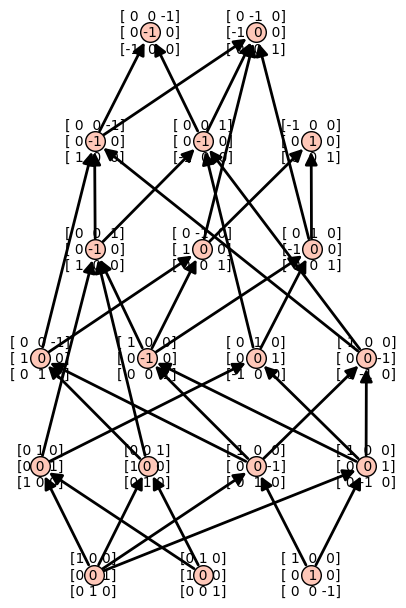

In [14]:
Poe.subposet(base).show()

In [101]:
htasm=[]
for x in AlternatingSignMatrices(6):
    if x.to_matrix()==matRotate(x.to_matrix()):
        htasm.append(x)
def validTestOne(mat):
    for i in range(len(mat.columns())/2):
        for j in range(len(mat.columns())/2):
            if mat[i][j]-1>mat[len(mat.columns())-i-1][j]:
                return false
    return true

for x in htasm:
    if validTestOne(gwl(x.to_matrix()))==false:
        print gwl(x.to_matrix())
        print '---------'

[1 1 0 0 0]
[1 2 1 0 0]
[0 1 1 1 0]
[0 0 1 2 1]
[0 0 0 1 1]
---------
[1 1 0 0 0]
[1 2 1 0 0]
[0 1 2 1 0]
[0 0 1 2 1]
[0 0 0 1 1]
---------
[1 1 0 0 0]
[1 2 1 0 0]
[1 1 1 1 1]
[0 0 1 2 1]
[0 0 0 1 1]
---------
[1 1 0 0 0]
[1 2 1 0 0]
[1 1 2 1 1]
[0 0 1 2 1]
[0 0 0 1 1]
---------
[1 1 1 0 0]
[1 2 1 0 0]
[0 1 1 1 0]
[0 0 1 2 1]
[0 0 1 1 1]
---------
[1 1 1 0 0]
[1 2 1 0 0]
[0 1 2 1 0]
[0 0 1 2 1]
[0 0 1 1 1]
---------
[1 1 1 0 0]
[1 2 1 0 0]
[1 1 1 1 1]
[0 0 1 2 1]
[0 0 1 1 1]
---------
[1 1 1 0 0]
[1 2 1 0 0]
[1 1 2 1 1]
[0 0 1 2 1]
[0 0 1 1 1]
---------


In [39]:
basmm=Poe.subposet(guys).order_ideals_lattice()
len(basmm)

NameError: name 'guys' is not defined

In [ ]:
basmmm=Poe.subposet(guys).order_ideals_lattice()
len(basmmm)

In [77]:
walds=[]
for x in bigrasses:
    walds.append(gwl(unfold(x.matrix())))
#for x in walds:
 #   x.set_immutable()
len(walds)

20

In [80]:
for x in macn:
    x.set_immutable()
Woe=Poset([macn,lambda i,j: matleq(i,j)])

In [79]:
def join(A,B):
    return matrix(len(A.rows()),len(A.columns()),lambda i,j: max(A[i][j],B[i][j]))
def meet(A,B):
    return matrix(len(A.rows()),len(A.columns()),lambda i,j: min(A[i][j],B[i][j]))
macn=[]
for x in walds:
    for y in walds:
        if join(x,y) not in macn:
            macn.append(join(x,y))
for x in walds:
    for y in walds:
        if meet(x,y) not in macn:
            macn.append(meet(x,y))
for x in macn:
    for y in macn:
        if join(x,y) not in macn:
            macn.append(join(x,y))
for x in macn:
    for y in macn:
        if meet(x,y) not in macn:
            macn.append(meet(x,y))

len(macn)

132

In [44]:
Woe.is_isomorphic(basm)

True

In [81]:
basguys=[]
for x in AlternatingSignMatrices(6):
    if x.to_matrix()==matRotate(x.to_matrix()) and gwl(x.to_matrix()) not in macn:
        print gwl(x.to_matrix())
        basguys.append(gwl(x.to_matrix()))
        print '--------'

[1 1 0 0 0]
[1 2 1 0 0]
[0 1 1 1 0]
[0 0 1 2 1]
[0 0 0 1 1]
--------
[1 1 0 0 0]
[1 2 1 0 0]
[0 1 2 1 0]
[0 0 1 2 1]
[0 0 0 1 1]
--------
[1 1 0 0 0]
[1 2 1 0 0]
[1 1 1 1 1]
[0 0 1 2 1]
[0 0 0 1 1]
--------
[1 1 0 0 0]
[1 2 1 0 0]
[1 1 2 1 1]
[0 0 1 2 1]
[0 0 0 1 1]
--------
[1 1 1 0 0]
[1 2 1 0 0]
[0 1 1 1 0]
[0 0 1 2 1]
[0 0 1 1 1]
--------
[1 1 1 0 0]
[1 2 1 0 0]
[0 1 2 1 0]
[0 0 1 2 1]
[0 0 1 1 1]
--------
[1 1 1 0 0]
[1 2 1 0 0]
[1 1 1 1 1]
[0 0 1 2 1]
[0 0 1 1 1]
--------
[1 1 1 0 0]
[1 2 1 0 0]
[1 1 2 1 1]
[0 0 1 2 1]
[0 0 1 1 1]
--------


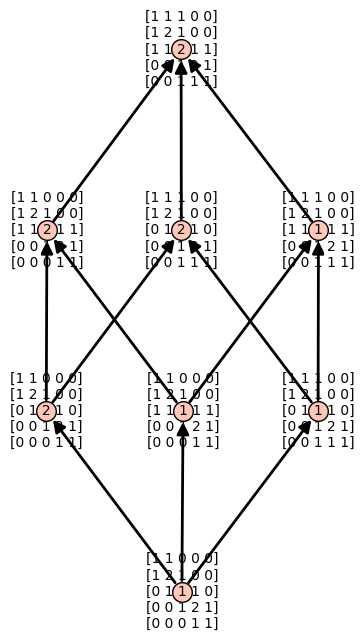

In [83]:
for x in basguys:
    x.set_immutable()
badP=Poset([basguys,lambda i ,j: matleq(i,j)])
badP.show()

In [23]:
asmWalds=[]
for x in AlternatingSignMatrices(8):
    asmWalds.append(gwl(x.to_matrix()))
def ABaseSet(wald):
    baseSet=[]
    for i,x in enumerate(wald.columns()):
        for j,y in enumerate(wald.rows()):
            if wald-Matrix(len(wald.columns()),len(wald.rows()),lambda a,b: 1 if a==i and b==j else 0) in asmWalds:
                baseSet.append(wald-Matrix(len(wald.columns()),len(wald.rows()),lambda a,b: a==i and b==j))
    return baseSet
maybeBase=[]
for x in base:
    if len(ABaseSet(gwl(unfold(x.matrix()))))==4:
        maybeBase.append(gwl(unfold(x.matrix())))
        print gwl(unfold(x.matrix()))
        print '---------'
len(maybeBase)

[0 0 0 0 0 0 0]
[0 1 1 0 0 0 0]
[0 1 2 1 1 0 0]
[0 0 1 1 1 0 0]
[0 0 1 1 2 1 0]
[0 0 0 0 1 1 0]
[0 0 0 0 0 0 0]
---------
[1 1 0 0 0 0 0]
[1 2 1 0 0 0 0]
[1 2 2 1 1 1 0]
[0 1 1 1 1 1 0]
[0 1 1 1 2 2 1]
[0 0 0 0 1 2 1]
[0 0 0 0 0 1 1]
---------
[1 1 1 0 0 0 0]
[1 2 2 1 1 0 0]
[0 1 2 1 1 0 0]
[0 0 1 1 1 0 0]
[0 0 1 1 2 1 0]
[0 0 1 1 2 2 1]
[0 0 0 0 1 1 1]
---------
[1 1 1 0 0 0 0]
[1 2 2 1 1 0 0]
[1 2 3 2 2 1 0]
[0 1 2 2 2 1 0]
[0 1 2 2 3 2 1]
[0 0 1 1 2 2 1]
[0 0 0 0 1 1 1]
---------


4

In [ ]:
def fall(n,i,j,k,a,b):
    if a 
def Balldown(n,i,j,k):
    return matrix(n,n,lambda a,b: fall(n,i,j,k,a,b))

In [25]:
maybeBase=[]
for x in base:
    if len(ABaseSet(gwl(unfold(x.matrix()))))==2:
        maybeBase.append(gwl(unfold(x.matrix())))
        print gwl(unfold(x.matrix()))
        print '---------'
len(maybeBase)

[1 0 0 0 0 0 0]
[0 0 0 0 0 0 0]
[0 0 0 0 0 0 0]
[0 0 0 0 0 0 0]
[0 0 0 0 0 0 0]
[0 0 0 0 0 0 0]
[0 0 0 0 0 0 1]
---------
[0 0 0 0 0 0 0]
[0 1 0 0 0 0 0]
[0 0 0 0 0 0 0]
[0 0 0 0 0 0 0]
[0 0 0 0 0 0 0]
[0 0 0 0 0 1 0]
[0 0 0 0 0 0 0]
---------
[0 0 0 0 0 0 0]
[0 0 0 0 0 0 0]
[0 0 1 0 0 0 0]
[0 0 0 0 0 0 0]
[0 0 0 0 1 0 0]
[0 0 0 0 0 0 0]
[0 0 0 0 0 0 0]
---------
[1 0 0 0 0 0 0]
[1 1 0 0 0 0 0]
[0 0 0 0 0 0 0]
[0 0 0 0 0 0 0]
[0 0 0 0 0 0 0]
[0 0 0 0 0 1 1]
[0 0 0 0 0 0 1]
---------
[1 1 0 0 0 0 0]
[0 1 0 0 0 0 0]
[0 0 0 0 0 0 0]
[0 0 0 0 0 0 0]
[0 0 0 0 0 0 0]
[0 0 0 0 0 1 0]
[0 0 0 0 0 1 1]
---------
[0 0 0 0 0 0 0]
[0 1 0 0 0 0 0]
[0 1 1 0 0 0 0]
[0 0 0 0 0 0 0]
[0 0 0 0 1 1 0]
[0 0 0 0 0 1 0]
[0 0 0 0 0 0 0]
---------
[0 0 0 0 0 0 0]
[0 1 1 0 0 0 0]
[0 0 1 0 0 0 0]
[0 0 0 0 0 0 0]
[0 0 0 0 1 0 0]
[0 0 0 0 1 1 0]
[0 0 0 0 0 0 0]
---------
[0 0 0 0 0 0 0]
[0 0 0 0 0 0 0]
[0 0 1 0 0 0 0]
[0 0 1 1 1 0 0]
[0 0 0 0 1 0 0]
[0 0 0 0 0 0 0]
[0 0 0 0 0 0 0]
---------
[0 0 0 0 0 0 0]
[0 0 0 0

36

In [ ]:
def isWald(mat):
    for i,x in enumerate(mat.rows()):
        for j,y in enumerate(mat.columns()):
            